# Cylindrical Fibers with step index

**Scott Prahl**

**Feb 2020**

In [2]:
%matplotlib inline
import sys
import numpy as np
import matplotlib.pyplot as plt

try:
    import ofiber.cylinder_step
except:
    print("***** You need to install the ofiber module!")
    print("***** Copy the line below into a new cell, run that cell, then re-start Jupyter.")
    print()
    print("!{sys.executable} -m pip install ofiber")

## Single mode in a circular step fiber V=2 

(Ghatak Fig 8.1)

Use `ofiber.Plot_LP_modes` to make a quick plot showing the allowed modes.

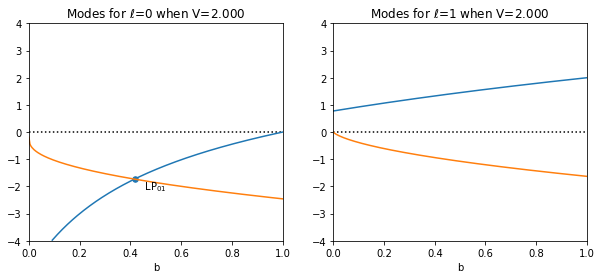

LP_01, b=0.4162


In [13]:
V=2
ell = 0
plt.subplots(1, 2, figsize=(10, 4))
plt.subplot(1, 2, 1)
aplt = ofiber.cylinder_step.Plot_LP_modes(V,ell)
plt.subplot(1, 2, 2)
ell=1
aplt = ofiber.cylinder_step.Plot_LP_modes(V,ell)
aplt.show()

for ell in range(2):
    all_b = ofiber.LP_mode_values(V,ell)
    for i,b in enumerate(all_b):
        print("LP_%d%d, b=%.4f"%(ell,i+1,b))

## Multiple modes in a circular step fiber V=12.5

Use `ofiber.Plot_LP_modes` to make a quick plot showing the allowed modes.

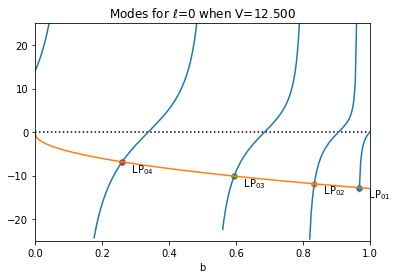

LP_01, b=0.9683
LP_02, b=0.8336
LP_03, b=0.5942
LP_04, b=0.2597
LP_11, b=0.9196
LP_12, b=0.7319
LP_13, b=0.4427
LP_14, b=0.0735
LP_21, b=0.8558
LP_22, b=0.6155
LP_23, b=0.2791
LP_31, b=0.7777
LP_32, b=0.4850
LP_33, b=0.1070
LP_41, b=0.6860
LP_42, b=0.3415
LP_51, b=0.5812
LP_52, b=0.1863


In [15]:
V=12.5
ell = 0
aplt = ofiber.Plot_LP_modes(V,ell)
aplt.show()

for ell in range(6):
    all_b = ofiber.LP_mode_values(V,ell)
    for i,b in enumerate(all_b):
        print("LP_%d%d, b=%.4f"%(ell,i+1,b))

## Modes in a circular step fiber V=2.4

Here we use `ofiber.Plot_LP_modes` to show the allowed the mode parameters.  This should be, and is, a single mode fiber.

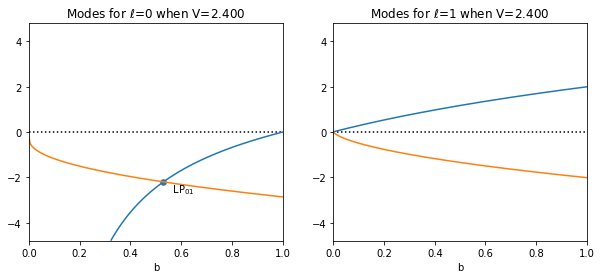

LP_01, b=0.5300


In [16]:
V=2.4
plt.subplots(1, 2, figsize=(10, 4))
plt.subplot(1, 2, 1)

aplt = ofiber.Plot_LP_modes(V,0)
plt.subplot(1, 2, 2)

aplt = ofiber.Plot_LP_modes(V,1)
aplt.show()

for ell in range(6):
    all_b = ofiber.LP_mode_values(V,ell)
    for i,b in enumerate(all_b):
        print("LP_%d%d, b=%.4f"%(ell,i+1,b))

## Ghatak Table 8.1

Summarizing all the important parameters for low V-parameter fibers.

In [6]:
V=np.linspace(1.5,2.5,41)
ell=0
em=1
print('  V       b       U       W     wp/a   MFD/a')
for v in V:
    b = ofc.LP_mode_value(v,ell,em)
    W = v*np.sqrt(b)
    U = v*np.sqrt(1-b)
    w_p = ofc.PetermannW(v)
    w_mfd = ofc.MFD(v)
    print("%.3f %.5f %.5f %.5f %.5f %.5f"%(v,b,U,W,w_p,w_mfd))

  V       b       U       W     wp/a   MFD/a
1.500 0.22925 1.31689 0.71820 1.69342 1.78402
1.525 0.23955 1.32985 0.74640 1.65638 1.73858
1.550 0.24980 1.34252 0.77469 1.62172 1.69659
1.575 0.25997 1.35489 0.80305 1.58923 1.65769
1.600 0.27006 1.36698 0.83148 1.55872 1.62156
1.625 0.28007 1.37880 0.85997 1.53001 1.58793
1.650 0.28997 1.39034 0.88851 1.50295 1.55654
1.675 0.29977 1.40163 0.91709 1.47741 1.52720
1.700 0.30947 1.41267 0.94571 1.45326 1.49970
1.725 0.31905 1.42347 0.97435 1.43040 1.47387
1.750 0.32851 1.43403 1.00303 1.40872 1.44958
1.775 0.33785 1.44436 1.03172 1.38814 1.42668
1.800 0.34707 1.45448 1.06043 1.36858 1.40505
1.825 0.35616 1.46437 1.08914 1.34996 1.38460
1.850 0.36512 1.47406 1.11787 1.33223 1.36523
1.875 0.37396 1.48355 1.14660 1.31531 1.34684
1.900 0.38266 1.49285 1.17533 1.29915 1.32938
1.925 0.39123 1.50195 1.20406 1.28371 1.31276
1.950 0.39967 1.51087 1.23279 1.26893 1.29692
1.975 0.40798 1.51962 1.26150 1.25478 1.28182
2.000 0.41616 1.52818 1.29021 1.241

## Variation of normalized propagation constant with V

Ghatak Figure 8.5

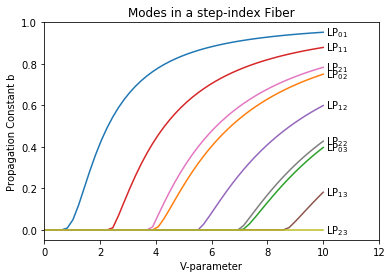

In [7]:
V = np.linspace(0.01,10,50)
b = np.empty_like(V)

for ell in range(3):
    for em in range(1,4):
        for i in range(len(V)):
            b[i] = ofc.LP_mode_value(V[i],ell,em)
        plt.plot(V,b)
        plt.annotate(r' LP$_{%d%d}$'%(ell,em), xy=(10,b[-1]),va='center')

plt.xlim(0,12)
plt.xlabel("V-parameter")
plt.ylabel('Propagation Constant b')
plt.title('Modes in a step-index Fiber')
plt.show()

## Radial Intensity distributions

Ghatak Figure 8.6

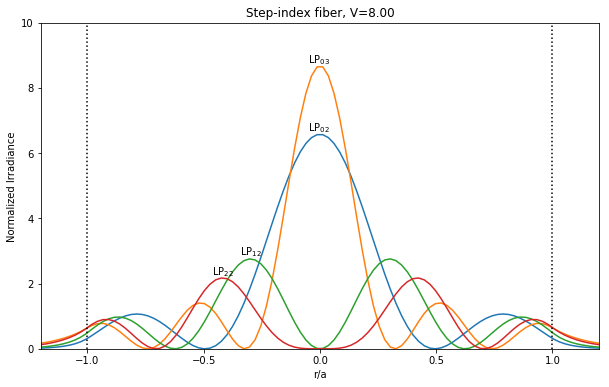

In [8]:
plt.subplots(figsize=(10,6))
r_over_a = np.linspace(-1.2,1.2,100)
V=8
for ell in range(3):
    for em in range(2,4):
        b = ofc.LP_mode_value(V,ell,em)
        if b == 0 :
            continue
        irradiance = ofc.LP_radial_irradiance(V,b,ell,r_over_a)
        i = np.argmax(irradiance)

        plt.plot(r_over_a,irradiance)
        plt.annotate(r' LP$_{%d%d}$'%(ell,em), xy=(r_over_a[i],irradiance[i]),va='bottom',ha='center')

plt.xlabel('r/a')
plt.ylabel('Normalized Irradiance')
plt.plot([-1,-1],[0,10],':k')
plt.plot([1,1],[0,10],':k')

plt.title('Step-index fiber, V=%.2f'%V)
plt.ylim(0,10)
plt.xlim(-1.2,1.2)
plt.show()

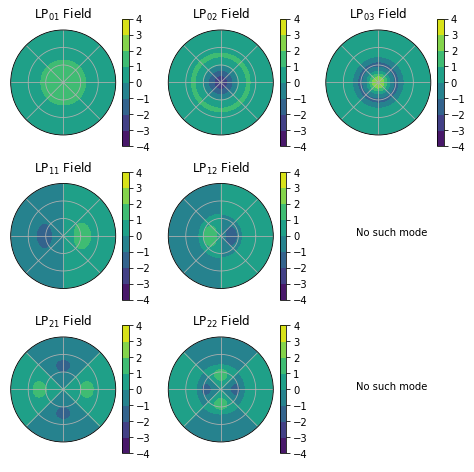

In [9]:
V=8

r_over_a = np.linspace(0, 1.5, 50)
phi = np.linspace(0, 2*np.pi, 40)

clevs = np.linspace(-4, 4, 9)

fig,ax=plt.subplots(3,3,figsize=(8,8))

graph = 0
for ell in [0,1,2]:
    for em in [1,2,3]:
        graph = graph+1 
        
        b = ofc.LP_mode_value(V,ell,em)
        if b==0 :
            ax=plt.subplot(3,3,graph,polar=True)
            plt.axis('off')
            plt.annotate('No such mode', xy=(0,0), ha='center')
            continue
        r_field = ofc.LP_radial_field(V,b,ell,r_over_a)
        phi_field = np.cos(ell*phi)
        R, PHI = np.meshgrid(r_over_a, phi)
        R_FIELD, PHI_FIELD = np.meshgrid(phi_field,r_field)
        Z = R_FIELD*PHI_FIELD

        ax=plt.subplot(3,3,graph,polar=True)
        cax=ax.contourf(phi,r_over_a,Z,levels=clevs)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        fig.colorbar(cax)
        plt.title(r"LP$_{%d%d}$ Field"%(ell,em))

plt.show()

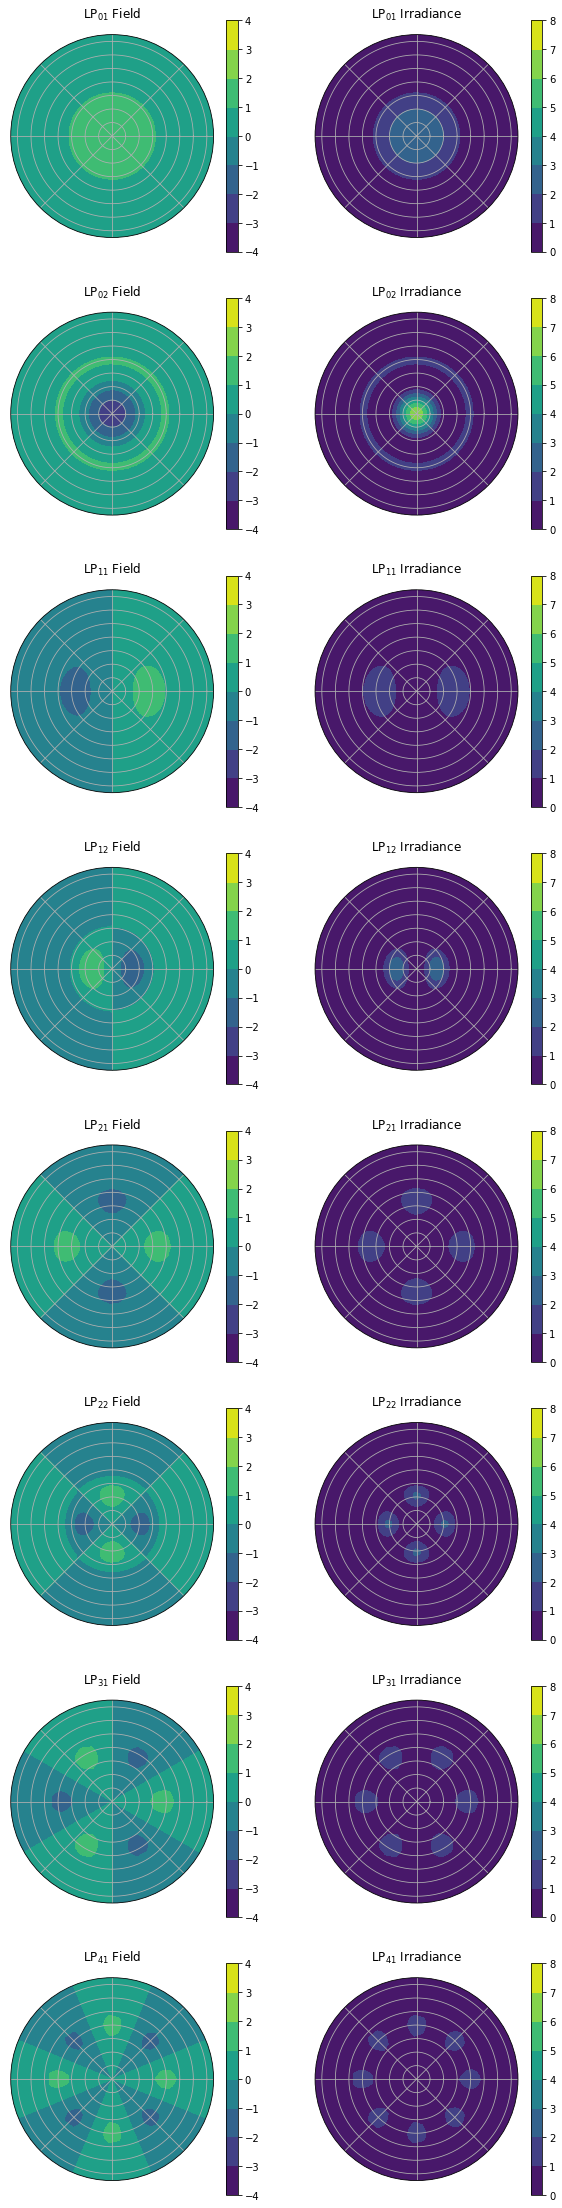

In [10]:
V=8

r_over_a = np.linspace(0, 1.5, 50)
phi = np.linspace(0, 2*np.pi, 40)
R, PHI = np.meshgrid(r_over_a, phi)

clevs = np.linspace(-4, 4, 9)
dlevs = np.linspace(0, 8, 9)

fig,ax=plt.subplots(figsize=(10,40))

graph = 0
rows = 8
cols = 2
for ell in range(5):
    phi_field = np.cos(ell*phi)

    for em in [1,2]:
        
        b = ofc.LP_mode_value(V,ell,em)
        if b==0 :
            continue
        r_field = ofc.LP_radial_field(V,b,ell,r_over_a)
        R_FIELD, PHI_FIELD = np.meshgrid(phi_field,r_field)
        Z = R_FIELD*PHI_FIELD

        graph += 1 

        ax=plt.subplot(rows,cols,graph,polar=True)
        cax=ax.contourf(phi,r_over_a,Z,levels=clevs)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        fig.colorbar(cax)
        plt.title(r"LP$_{%d%d}$ Field"%(ell,em))
        
        graph += 1
        Z = Z*Z

        ax=plt.subplot(rows,cols,graph,polar=True)
        cax=ax.contourf(phi,r_over_a,Z,levels=dlevs)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        fig.colorbar(cax)
        plt.title(r"LP$_{%d%d}$ Irradiance"%(ell,em))

plt.show()

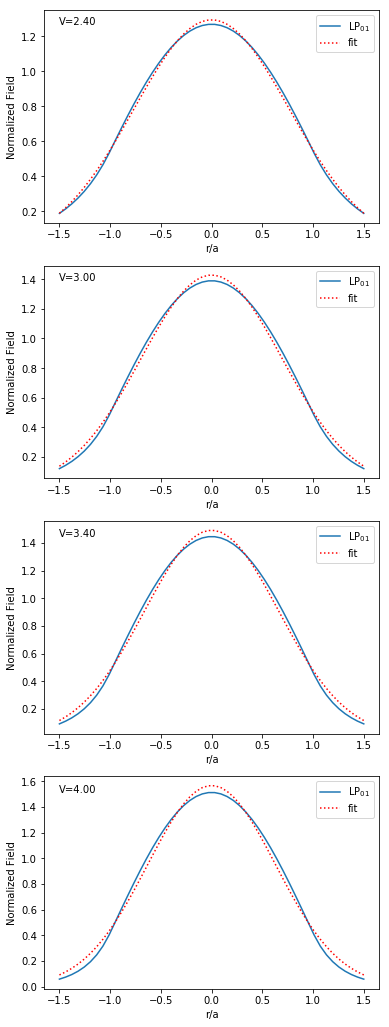

In [11]:
from scipy.optimize import curve_fit

def gauss(x, A, w):
    return A*np.exp(-x**2/w**2)

r_over_a = np.linspace(-1.5, 1.5, 50)
phi = 0


graph = 1
rows = 4
cols = 1

fig,ax=plt.subplots(figsize=(6,18))

ell = 0
em = 1

for V in [2.4,3,3.4,4]:

    b = ofc.LP_mode_value(V,ell,em)
    field = ofc.LP_radial_field(V,b,ell,r_over_a)

    plt.subplot(rows,cols,graph)
    plt.plot(r_over_a,field,label=r'LP$_{01}$')
    plt.annotate("V=%.2f"%V, xy=(-1.5,max(field)))
    
    popt, pcov = curve_fit(gauss, r_over_a, field)
    fit = gauss(r_over_a,popt[0],popt[1])
    plt.plot(r_over_a,fit,':r',label='fit')

    plt.ylabel('Normalized Field')
    plt.xlabel('r/a')
    plt.legend()
    graph += 1    

plt.show()

## Variation of the fractional power contained in the cladding with V

Ghatak Figure 8.11

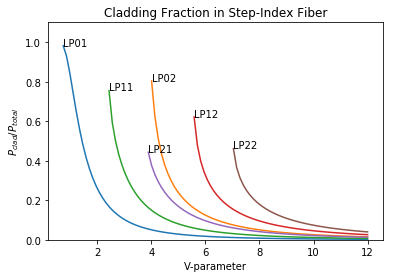

In [12]:
V=np.linspace(0.01,12,100)
ratio = np.empty_like(V)


ell = 0
for ell in [0,1,2]:

    for em in [1,2]:

        for i in range(len(V)):
            b = ofc.LP_mode_value(V[i],ell,em)
            clad = ofc.LP_clad_irradiance(V[i],b,ell)
            total = ofc.LP_total_irradiance(V[i],b,ell)
            ratio[i] = clad/total
        
        j = np.nanargmax(ratio)
        plt.annotate("LP%d%d"%(ell,em),xy=(V[j],ratio[j]))

        plt.plot(V,ratio)
plt.xlabel('V-parameter')
plt.ylabel(r'$P_{clad}/P_{total}$')
plt.ylim(0,1.1)
plt.title('Cladding Fraction in Step-Index Fiber')
plt.show()

## Variation of loss at a perfectly aligned joint between two single-mode fibers

Ghatak Figure 8.14

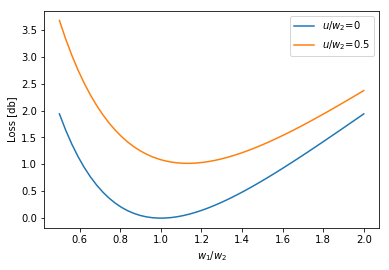

In [13]:
w1 = np.linspace(0.5,2,50)
w2 = np.ones_like(w1)

loss_db = ofc.Tranverse_misalignment_loss_db(w1,w2,0)
plt.plot(w1,loss_db,label=r'$u/w_2$=0')

loss_db = ofc.Tranverse_misalignment_loss_db(w1,w2,0.5)
plt.plot(w1,loss_db,label=r'$u/w_2$=0.5')

plt.xlabel(r'$w_1/w_2$')
plt.ylabel('Loss [db]')
plt.legend()
plt.show()


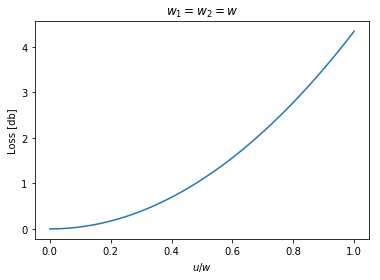

In [14]:
u = np.linspace(0,1,50)

loss_db = ofc.Tranverse_misalignment_loss_db(1,1,u)
plt.plot(u,loss_db)

plt.xlabel(r'$u/w$')
plt.ylabel('Loss [db]')
plt.title(r'$w_1=w_2=w$')
plt.show()